<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%202b/QUAD/QUAD_Assignment2B_Polars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison between Polars and Pandas

<br>
 <p align="center">
  <img src="https://raw.githubusercontent.com/Terence172/FirstR/main/Pictures/PandasNPolarBear.jpg" height = "200"/>
 </p>
</br>

🚀 Group Members QUAD (Team 8)

> 1. CHONG KAI ZHE
> 2. TERENCE A/L LOORTHANATHAN
> 3. RISHMA FATHIMA BINTI BASHER
> 4. NUR SYAMALIA FAIQAH BINTI MOHD KAMAL


In this part of the assingment, pandas and polars will be compared in different tests. Performance of each of libraries will be noted and the findings will be concluded.<br>
Comparisons will be evaluated through time execution of each their respective Python statements or expressions. Outputted in each comparison will be CPU and wall clock times.

## Downloading the Dataset

The dataset can be viewed in this [link](https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data)

To Mount Google Drive in which the dataset can be downloaded into, the code below has to be runned.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

The code below installs kaggle library, as it is needed in this procedure.

In [3]:
 !pip install -q kaggle

Now the `kaggle.json` file has to be uploaded, which contains an API token. This is needed as  Kaggle services has to be authenticated.

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"terenceloorthanathan","key":"5d26afa143c5568014eff11126795430"}'}

Now we have to,
*   Make a directory named “.kaggle”.
*   Copy the “kaggle.json” into this new directory.
*   Download the [Dataset](https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps) from Kaggle.



In [5]:
!mkdir -p ~/.kaggle #Creating a directory to store kaggle.json
!cp kaggle.json ~/.kaggle/ #Copy Kaggle.json to new directory

!chmod 600 /root/.kaggle/kaggle.json #To set permission for the kaggle.json

!kaggle datasets download -d elemento/nyc-yellow-taxi-trip-data #download dataset

100% 1.78G/1.78G [00:26<00:00, 96.2MB/s]
100% 1.78G/1.78G [00:26<00:00, 72.2MB/s]


Now we have to unzip the file that was just downloaded to acquire the csv file.

In [6]:
!unzip nyc-yellow-taxi-trip-data.zip #unzip the downloaded dataset

Archive:  nyc-yellow-taxi-trip-data.zip
  inflating: yellow_tripdata_2015-01.csv  
  inflating: yellow_tripdata_2016-01.csv  
  inflating: yellow_tripdata_2016-02.csv  
  inflating: yellow_tripdata_2016-03.csv  


## Installing and Importing Polars

Polars is a Python library for data visualization and analysis, and it is not included in the standard Python distribution. Therefore, in order to use it in your Google Colab notebook or any other project, you need to install it first.

In [7]:
!pip install 'polars[all]'
#or
#pip install 'polars[numpy,pandas,pyarrow]' to  install a subset of all optional dependencies

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 72.8 MB/s eta 0:00:00


The code below will import polars as pl

In [8]:
import polars as pl

## Importing Pandas

For the purpose of manipulating and analysing data, the Python programming language has another software package called pandas. What is the difference? Pandas has a reputation for being slow processing large datasets. Polars on the other hand is developed to counter that flaw.
<br><br>
This time however, pandas is included in the standard Python distribution. This means, a single line of code is able to import the entire library.

In [9]:
import pandas as pd

## Comparison between Pandas and Polars

Comparison will be done by executing methods as follows, 
1. Basic operations
2. Aggregation operations
3. Attributes operations
4. Manipulation operations

Obtaining execution times for each

###Basic Operations

#### Pandas

In [10]:
%%time
# read csv file using pandas
df_pandas = pd.read_csv('yellow_tripdata_2015-01.csv')

CPU times: user 45.2 s, sys: 9.89 s, total: 55.1 s
Wall time: 1min 5s


In [11]:
%%time
df_pandas.head()

CPU times: user 317 µs, sys: 66 µs, total: 383 µs
Wall time: 2.94 ms


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


####Polars

In [12]:
%%time
# read csv file using polars
df_polars = pl.read_csv('yellow_tripdata_2015-01.csv')

CPU times: user 21.8 s, sys: 6.53 s, total: 28.3 s
Wall time: 27.6 s


In [32]:
%%time
df_polars.head()

CPU times: user 223 µs, sys: 51 µs, total: 274 µs
Wall time: 280 µs


VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
i64,str,str,i64,f64,f64,f64,i64,str,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64
2,"""2015-01-15 19:...","""2015-01-15 19:...",1,1.59,-73.993896,40.750111,1,"""N""",-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,"""2015-01-10 20:...","""2015-01-10 20:...",1,3.3,-74.001648,40.724243,1,"""N""",-73.994415,40.759109,1,14.5,0.5,0.5,2.0,0.0,0.3,17.8
1,"""2015-01-10 20:...","""2015-01-10 20:...",1,1.8,-73.963341,40.802788,1,"""N""",-73.95182,40.824413,2,9.5,0.5,0.5,0.0,0.0,0.3,10.8
1,"""2015-01-10 20:...","""2015-01-10 20:...",1,0.5,-74.009087,40.713818,1,"""N""",-74.004326,40.719986,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8
1,"""2015-01-10 20:...","""2015-01-10 20:...",1,3.0,-73.971176,40.762428,1,"""N""",-74.004181,40.742653,2,15.0,0.5,0.5,0.0,0.0,0.3,16.3


**Observation :** In terms of read operation it is very obvious that polars is much better at reading big csv files. With a 27.6s wall time compared to the pandas clocking at 65.0s. When it comes to the head methods, pandas has a walltime measured in miliseconds while polars measuring in microseconds.
<br><br> *for reference yellow_tripdata_2015-01.csv is 1.99GB in size*

###Aggregation Operation

#### Pandas

In [14]:
%%time
# summinng all the values in fare_amount using pandas
df_pandas['fare_amount'].sum()

CPU times: user 31.1 ms, sys: 8.81 ms, total: 39.9 ms
Wall time: 46.1 ms


151785085.34000006

In [15]:
%%time
# Finding the max value in fare_amount using pandas
df_pandas['fare_amount'].max()

CPU times: user 42 ms, sys: 593 µs, total: 42.6 ms
Wall time: 44.1 ms


4008.0

In [16]:
%%time
# Finding the mean value of fare_amount column using pandas
df_pandas['fare_amount'].mean()

CPU times: user 42.3 ms, sys: 1.7 ms, total: 44 ms
Wall time: 42.9 ms


11.905659425777083

####Polars

In [17]:
%%time
# summinng all the values in fare_amount using polars
df_polars['fare_amount'].sum()

CPU times: user 11.7 ms, sys: 905 µs, total: 12.6 ms
Wall time: 27.2 ms


151785085.33998457

In [18]:
%%time
# Finding the max value in fare_amount using polars
df_polars['fare_amount'].max()

CPU times: user 14.1 ms, sys: 0 ns, total: 14.1 ms
Wall time: 30.3 ms


4008.0

In [19]:
%%time
# Finding the mean value of fare_amount column using polars
df_polars['fare_amount'].mean()

CPU times: user 10.4 ms, sys: 0 ns, total: 10.4 ms
Wall time: 10.3 ms


11.905659425775866

**Observation :** When it comes to aggregation, polars again is clocking in much better times than its counterpart.
<br>

###Attributes Operations

#### Pandas

In [20]:
%%time
df_pandas.dtypes #Get Datatypes for pandas

CPU times: user 317 µs, sys: 74 µs, total: 391 µs
Wall time: 401 µs


VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [21]:
%%time
df_pandas.columns # Get columns in dataframe (Pandas)

CPU times: user 13 µs, sys: 3 µs, total: 16 µs
Wall time: 20 µs


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [22]:
%%time
df_pandas.shape # Get shape of the dataframe (Pandas)

CPU times: user 29 µs, sys: 7 µs, total: 36 µs
Wall time: 40.3 µs


(12748986, 19)

####Polars

In [23]:
%%time
df_polars.dtypes #Get Datatypes for polars

CPU times: user 44 µs, sys: 11 µs, total: 55 µs
Wall time: 59.1 µs


[Int64,
 Utf8,
 Utf8,
 Int64,
 Float64,
 Float64,
 Float64,
 Int64,
 Utf8,
 Float64,
 Float64,
 Int64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64]

In [24]:
%%time
df_polars.columns # Get columns in dataframe (Polars)

CPU times: user 23 µs, sys: 6 µs, total: 29 µs
Wall time: 32.4 µs


['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'RateCodeID',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

In [25]:
%%time
df_polars.shape # Get shape of the dataframe (Polars)

CPU times: user 14 µs, sys: 3 µs, total: 17 µs
Wall time: 21 µs


(12748986, 19)

**Observation :** When it comes to determining dtypes polars does it faster and cleaner. Getting column names however, pandas is faster than polars. Talking about the formatting for the output of columns functions, polars is much better visually. Getting the shape of the dataset, polars is much faster than pandas.


###Manipulation Operations

#### Pandas

In [38]:
%%time
df_pandas['fare_amount'] #Selecting fare_amount column

CPU times: user 68 µs, sys: 0 ns, total: 68 µs
Wall time: 73.7 µs


0           12.0
1           14.5
2            9.5
3            3.5
4           15.0
            ... 
12748981     5.5
12748982     6.0
12748983    13.5
12748984    10.5
12748985     5.5
Name: fare_amount, Length: 12748986, dtype: float64

In [27]:
%%time
grouped_pandas = df_pandas.groupby('VendorID')['fare_amount'].sum() #grouping sum of fare amounts by vendor ID using pandas

CPU times: user 279 ms, sys: 135 ms, total: 414 ms
Wall time: 531 ms


####Polars

In [37]:
%%time 
df_polars.select("fare_amount") #Selecting fare_amount column

CPU times: user 0 ns, sys: 441 µs, total: 441 µs
Wall time: 3.42 ms


fare_amount
f64
12.0
14.5
9.5
3.5
15.0
27.0
14.0
7.0
52.0


In [29]:
%%time 
grouped_polars = df_polars.groupby("VendorID").agg(pl.col("fare_amount").sum()) #grouping sum of fare amounts by vendor ID using polars

CPU times: user 306 ms, sys: 75.5 ms, total: 382 ms
Wall time: 392 ms


**Observation :** For data manipulation, still polars prooves to be much faster than pandas. In terms of selecting and grouping the columns by VendorID and summing the fare_amount, polars is much faster.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

ops = ['read', 'mean', 'dtypes', 'select'] # List of one operations from each category

plot = pd.DataFrame({'Pandas': [65, 42.9, 401, 73.7], 'Polars': [27.6, 10.3, 59.1, 3420]}, index = ops) #Wall time recorded to execute each operation in terms of pandas and polars
plot


,Pandas,Polars
read,65.0,27.6
mean,42.9,10.3
dtypes,401.0,59.1
select,73.7,3420.0


### Visualisations to show comparisons between Pandas and Polars

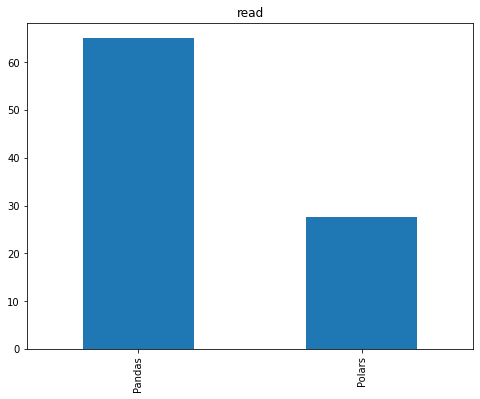

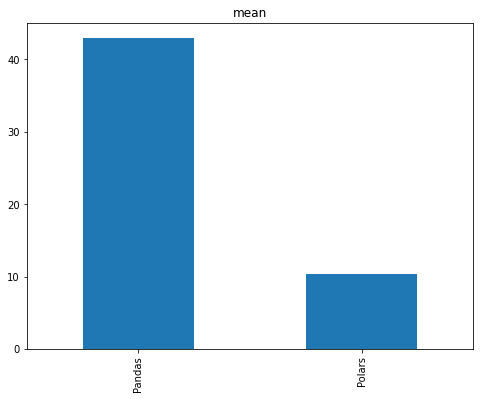

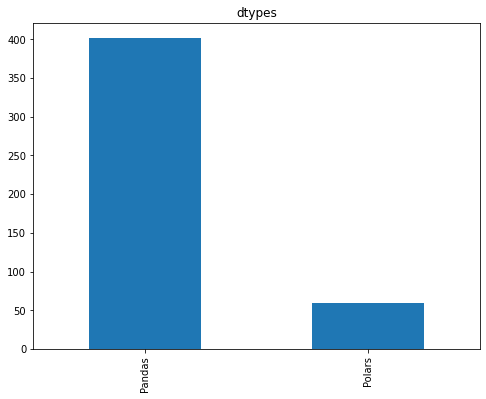

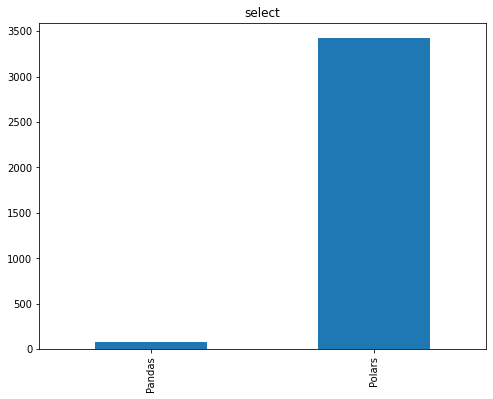

In [42]:
for op in plot.index:
  plt.figure(figsize=(8,6))
  plot.loc[op].plot(kind='bar', title=op)
  plt.show()
  print()

### Conclusion
In short polars did do great in terms of execution times when put against its counterpart, pandas. In all categories, Basic, Aggregation, Attributes, and Manipulation operations polars was the decisive winner.